# CHENNAI HOUSING PRICE PREDICTION

# Data importing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
path= r"C:\Users\AJS\Documents\data science and ML\machine learning\chennai_house_price_prediction.csv"
df = pd.read_csv(path)

In [3]:
df.keys()

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [5]:
df.shape

(7109, 19)

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


We see many missing data over here in 'count' row

In [7]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
temp= pd.DataFrame(index=df.columns)
temp['unique_count']=df.nunique()
temp['data_type']=df.dtypes
temp

,unique_count,data_type
PRT_ID,7109,object
AREA,17,object
INT_SQFT,1699,int64
DIST_MAINROAD,201,int64
N_BEDROOM,4,float64
N_BATHROOM,2,float64
N_ROOM,5,int64
SALE_COND,9,object
PARK_FACIL,3,object
BUILDTYPE,5,object


As N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND,PARK_FACIL, BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE have less unique count hence they have to be an object type

In [9]:
df.drop_duplicates(inplace=True)

## Data Cleaning

In [10]:
temp= ['AREA','N_BATHROOM','N_BEDROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('----------value count in',i,'----------')
    print(df[i].value_counts())
    print('')

----------value count in AREA ----------
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Velchery         2
Ann Nagar        2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

----------value count in N_BATHROOM ----------
1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

----------value count in N_BEDROOM ----------
1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

----------value count in N_ROOM ----------
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

----------value count in SALE_COND ----------
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

----

In [11]:
df['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','KKNagar':'KK Nagar','Karapakam':'Karapakkam',
                    'Velchery':'Velachery','TNagar':'T Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adyar','Ann Nagar':'Anna Nagar'}, inplace=True)
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [12]:
df['SALE_COND'].replace({'AdjLand':'Adj Land','AbNormal':'Ab Normal','Partiall':'Partial','PartiaLl':'Partial'}, inplace=True)
df['SALE_COND'].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [13]:
df['PARK_FACIL'].replace({'Noo':'No'},inplace=True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [14]:
df['BUILDTYPE'].replace({'Other':'Others','Comercial':'Commercial'},inplace=True)
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [15]:
df['UTILITY_AVAIL'].replace({'AllPub':'All Pub','NoSewr ':'NoSeWa'},inplace=True)
df['UTILITY_AVAIL'].value_counts()

NoSeWa     3700
All Pub    1887
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [16]:
df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
df['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [17]:
df.groupby(['N_BEDROOM','N_BATHROOM']).mean()

INT_SQFT  DIST_MAINROAD    N_ROOM  QS_ROOMS  \
N_BEDROOM N_BATHROOM                                                   
1.0       1.0         1077.950936      99.815352  2.954366  3.506726   
2.0       1.0         1642.023372      98.886477  4.299388  3.521925   
          2.0         1448.557762     101.138989  4.000000  3.545126   
3.0       2.0         1947.609618      98.067893  5.000000  3.524894   
4.0       2.0         2364.141732     101.744094  6.000000  3.573228   

                      QS_BATHROOM  QS_BEDROOM  QS_OVERALL         COMMIS  \
N_BEDROOM N_BATHROOM                                                       
1.0       1.0            3.512793    3.471432    3.496140  113343.270905   
2.0       1.0            3.513578    3.496439    3.512032  166802.044519   
          2.0            3.480686    3.518592    3.512664  135861.722022   
3.0       2.0            3.486280    3.494908    3.502646  190708.428571   
4.0       2.0            3.499606    3.520079    3.532688  245631.437008   

                       SALES_PRICE  
N_BEDROOM N_BATHROOM                
1.0       1.0         9.789967e+06  
2.0       1.0         1.256098e+07  
          2.0         9.399027e+06  
3.0       2.0         1.247813e+07  
4.0       2.0         1.445131e+07

In [18]:
(1.256098e+07+9.399027e+06)/2

10980003.5

In [19]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [20]:
for i in range(0,len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if df.N_BEDROOM[i] ==1:
            df.N_BATHROOM[i]=1
        elif df.N_BEDROOM[i] ==2 and df.SALES_PRICE[i]<10980003.5:
            df.N_BATHROOM[i]=1
        else:
            df.N_BATHROOM[i]=1 

In [21]:
df.N_BATHROOM.isnull().sum()

0

In [22]:
df[df.N_BEDROOM.isnull()]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,181,NaN,1.0,4,Partial,No,House,NoSeWa,No Access,RM,4.8,2.7,2.0,3.155,107978,10797790


As this has only 1 null value we can do it manually. It has only 1 bathroom and price is greater than 10980003.5 hence bedroom=2

In [23]:
df['N_BEDROOM'].fillna(2.0,inplace=True)

In [24]:
temp=df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']]

In [25]:
temp.head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


Just to check if QS_OVERALL is nothing but average of all the separate QS

In [26]:
temp['Q_AVG']=(temp.QS_ROOMS+temp.QS_BATHROOM+temp.QS_BEDROOM)/3
temp['difference']=temp['Q_AVG']-temp.QS_OVERALL

In [27]:
temp[50:58]

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Q_AVG,difference
50,2.1,4.3,3.9,3.460,3.433333,-0.026667
51,2.7,2.7,4.1,3.260,3.166667,-0.093333
52,4.8,2.1,5.0,4.070,3.966667,-0.103333
53,3.1,2.9,4.7,3.680,3.566667,-0.113333
54,2.0,3.9,3.4,3.080,3.100000,0.020000
55,3.1,2.2,3.4,2.950,2.900000,-0.050000
56,2.8,3.7,3.5,3.350,3.333333,-0.016667
57,2.0,3.7,4.4,3.505,3.366667,-0.138333


So it has only little diff hence we can change the missing values to its mean

In [28]:
for i in range(0,len(df)):
    if pd.isnull(df.QS_OVERALL[i])==True:
        df.QS_OVERALL[i]=(df.QS_ROOMS[i]+df.QS_BATHROOM[i]+df.QS_BEDROOM[i])/3

Removing other QS

In [29]:
df.drop(['QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'], axis=1,inplace=True)

In [30]:
df[:3]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,Commercial,All Pub,Paved,A,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,Commercial,All Pub,Gravel,RH,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,Commercial,ELO,Gravel,RL,3.090,92114,13159200


Even PRT_ID is of no use

In [31]:
df.drop(['PRT_ID'], axis=1,inplace=True)

# Data visualisation

In [32]:
df=df.astype({'N_BEDROOM':'object','N_BATHROOM':'object','N_ROOM':'object'})

<AxesSubplot:>

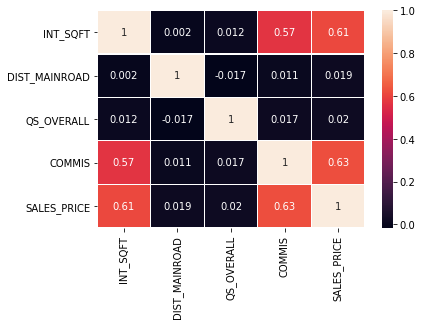

In [33]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=0.1)

So we can clearly see that the sales price is highly correlated with COMMIS and INT_SQT<br>Infact both of them are too correlated to eachother

### For continous variables

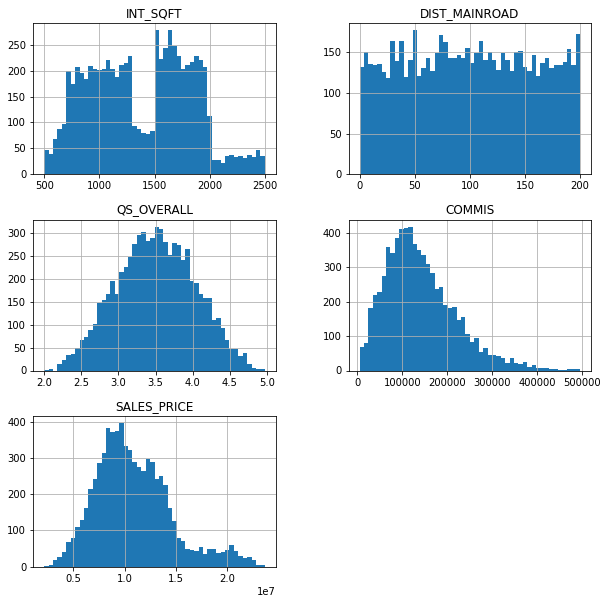

In [34]:
df.hist(bins=50,figsize=(10,10));

### For object type

In [35]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

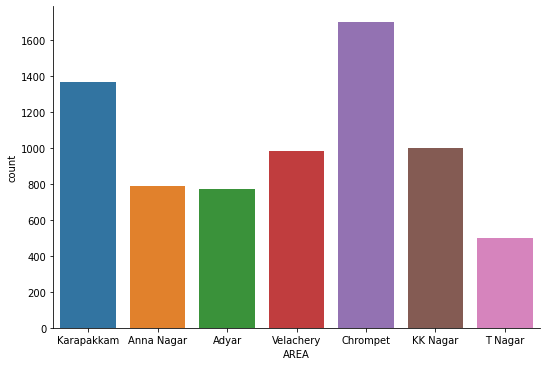

In [36]:
sns.catplot(x='AREA', data=df, kind='count', aspect=1.5)

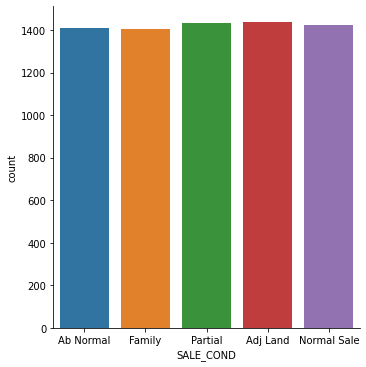

In [37]:
sns.catplot(x='SALE_COND', data=df, kind='count')

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

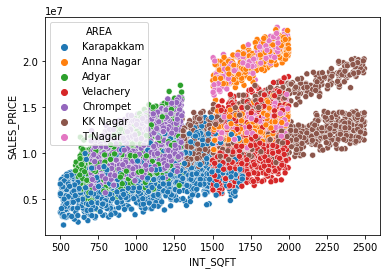

In [38]:
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df,hue='AREA')

From the above we can observe:<br>
1. Karapakkam has sqfeet range from roughly 500 to 1660 and price range from around 0.1 to 1.5
2. Adayar and Chrompet have sqfeet range from roughly 600 to 1250 and price range from around 0.7 to 1.75
3. T Nagar and Anna Nagar have sqfeet range from roughly 1500 to 2000 and price range from around 0.8 to 3
4. Velachery has sqfeet range from roughly 1500 to 2000 and price range from around 0.5 to 1.75
5. KK Nagar has sqfeet range from roughly 1250 to 2700 and price range from around 0.5 to 2.0

In [39]:
df.groupby('SALE_COND').mean()           

,INT_SQFT,DIST_MAINROAD,QS_OVERALL,COMMIS,SALES_PRICE
SALE_COND,,,,,
Ab Normal,1380.321758,99.216867,3.508493,143433.717931,1.091463e+07
Adj Land,1378.141765,98.599722,3.513961,144465.080612,1.120931e+07
Family,1373.263008,101.101924,3.504351,139461.338560,1.073642e+07
Normal Sale,1395.781448,99.451862,3.488783,143526.953619,1.099418e+07
Partial,1382.757851,99.674110,3.504181,134149.595255,1.061637e+07


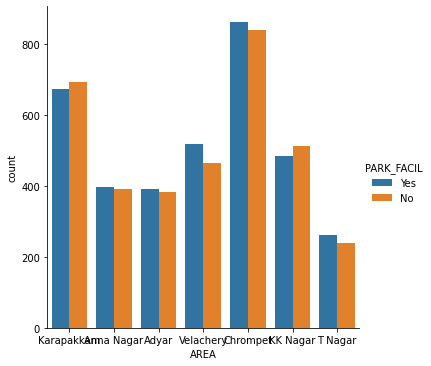

In [40]:
sns.catplot(x='AREA', data=df,hue='PARK_FACIL', kind='count')

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

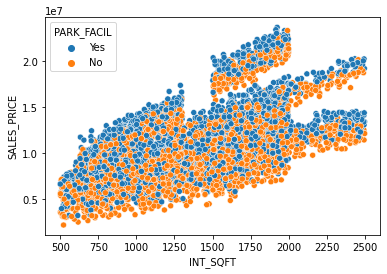

In [41]:
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df,hue='PARK_FACIL')

In [42]:
df.groupby('PARK_FACIL').mean()    

,INT_SQFT,DIST_MAINROAD,QS_OVERALL,COMMIS,SALES_PRICE
PARK_FACIL,,,,,
No,1379.941227,100.150483,3.509377,133257.150199,1.033805e+07
Yes,1384.166156,99.065793,3.498657,148613.890995,1.144168e+07


In [43]:
temp=pd.get_dummies(df.PARK_FACIL)
temp[:5]

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [44]:
df[:5]

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,Commercial,All Pub,Paved,A,4.330,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,Commercial,All Pub,Gravel,RH,3.765,304049,21717770
2,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,Commercial,ELO,Gravel,RL,3.090,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSeWa,Paved,I,4.010,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,Ab Normal,Yes,Others,All Pub,Gravel,C,3.290,74063,7406250


<AxesSubplot:xlabel='STREET', ylabel='count'>

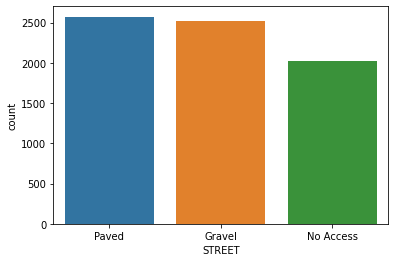

In [45]:

sns.countplot(x='STREET', data=df)

<AxesSubplot:xlabel='MZZONE', ylabel='count'>

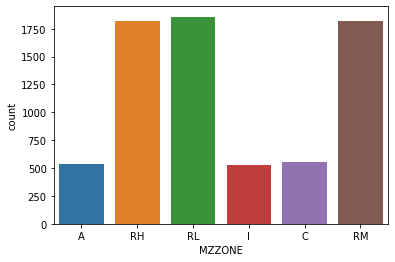

In [46]:
sns.countplot(x='MZZONE', data=df)

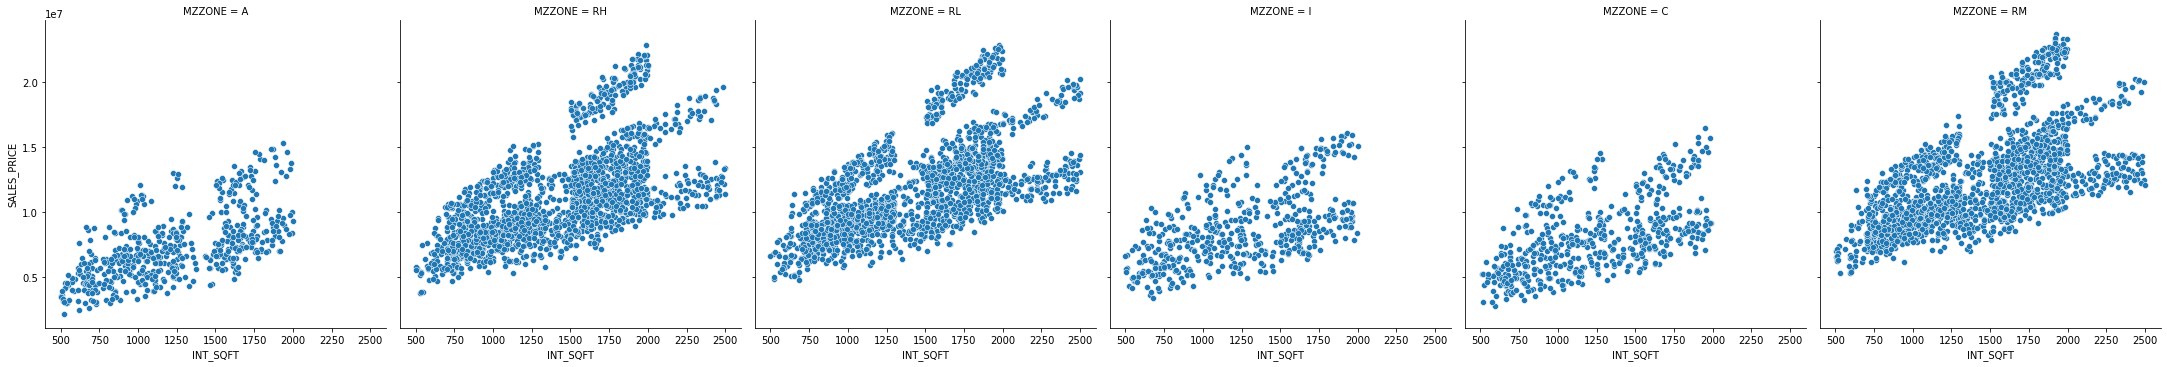

In [47]:
sns.relplot(x='INT_SQFT',y='SALES_PRICE',data=df,col='MZZONE')

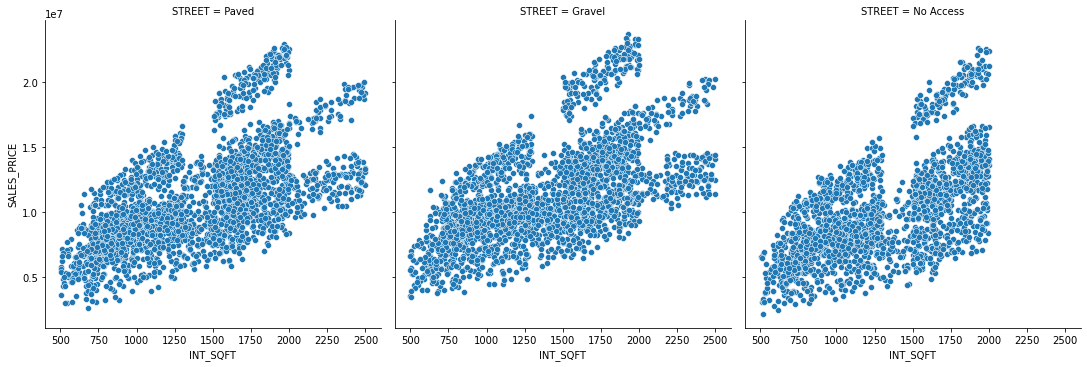

In [48]:
sns.relplot(x='INT_SQFT',y='SALES_PRICE',data=df,col='STREET')

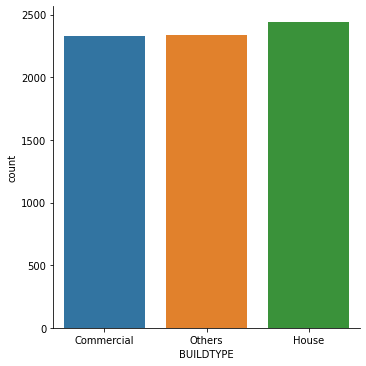

In [49]:
sns.catplot(x='BUILDTYPE', data=df,kind='count')

# Model building

In [50]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [51]:
one_hot = pd.get_dummies(df[['AREA','SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']])


In [52]:
one_hot[:5]

,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakkam,AREA_T Nagar,AREA_Velachery,SALE_COND_Ab Normal,SALE_COND_Adj Land,SALE_COND_Family,...,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [53]:
for i in range(0,len(df)):
    if df['PARK_FACIL'][i] == 'Yes':
        df['PARK_FACIL'][i]=1
    else:
        df['PARK_FACIL'][i]=0

In [54]:
df = df.drop(['AREA','SALE_COND','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE'],axis = 1)
df = df.join(one_hot)

In [55]:
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,...,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,1,4.330,144400,7600000,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,3.765,304049,21717770,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,3.090,92114,13159200,1,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0,4.010,77042,9630290,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,1.0,1.0,3,1,3.290,74063,7406250,0,...,0,1,0,0,0,1,0,0,0,0


In [56]:
x= df.drop(['SALES_PRICE'],axis=1)
x[:4]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_OVERALL,COMMIS,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSeWa,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1.0,1.0,3,1,4.330,144400,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,3.765,304049,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,3.090,92114,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,3.0,2.0,5,0,4.010,77042,0,0,...,1,0,0,1,0,0,1,0,0,0


In [57]:
y = df.SALES_PRICE
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [58]:
len(x)/len(y)

1.0

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.9541313994374702

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)

0.9557983036262545

### using k fold cross validation

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), x, y, cv=cv)


array([0.9541314 , 0.95525121, 0.9542028 , 0.95659952, 0.95484889])

In [63]:
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv)

array([0.95575385, 0.96203433, 0.9558167 , 0.96312927, 0.96022492])

### To find the best model

In [75]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
    
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_reggression': {
            'model': LinearRegression(),
            'params': { 
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=45)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [76]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_reggression,0.954449,{'normalize': False}
1,lasso,0.954449,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.970032,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [79]:
model=DecisionTreeRegressor(criterion='friedman_mse',splitter= 'random',random_state=45)
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=45,
                      splitter='random')

In [80]:
model.score(x_test,y_test)

0.9666098444633411

In [81]:
y_pred=model.predict(x_test)

In [82]:
new=pd.DataFrame(data=y_test)
y_pred

array([13397920.,  8583750., 16271740., ..., 12268750.,  7859750.,
        9103100.])